In [1]:
import polars as pl
from schema import *


recurring_expenses = pl.DataFrame([
    {
        description_cn: 'Total play prado vallejo',
        amount_cn: 415.00
    },
    {
        description_cn: 'Total play colima',
        amount_cn: 599.00
    },
    {
        description_cn: 'macbook pro',
        amount_cn: 1359
    },
    {
        description_cn: 'macbook pro 2',
        amount_cn: 553.27
    },
    {
        description_cn: 'Renta gdl',
        amount_cn: 10_000
    },
    {
        description_cn: 'Gasolina',
        amount_cn: 2_000
    },
    {
        description_cn: 'amazon msi mane',
        amount_cn: 79.79
    },
    {
        description_cn: 'amazon msi mane 2',
        amount_cn: 19.18
    },
    {
        description_cn: 'FSG039B',
        amount_cn: 2700
    },
    {
        description_cn: 'FSW306B',
        amount_cn: 4600
    },
    {
        description_cn: 'gym fer',
        amount_cn: 600
    },
    {
        description_cn: 'Super',
        amount_cn: 4_000
    },
    {
        description_cn: 'La Fractal',
        amount_cn: 600
    },
    {
        description_cn: 'Cuenta R y F',
        amount_cn: 1_000
    },
    {
        description_cn: 'Seek my car',
        amount_cn: 200,
    }
]).sort(amount_cn, descending=True)
recurring_expenses

description,amount
str,f64
"""Renta gdl""",10000.0
"""gid""",4600.0
"""Super""",4000.0
"""buk""",2700.0
"""Gasolina""",2000.0
…,…
"""macbook pro 2""",553.27
"""Total play prado vallejo""",415.0
"""Seek my car""",200.0


In [2]:
recurring_expenses[amount_cn].sum()

28725.24

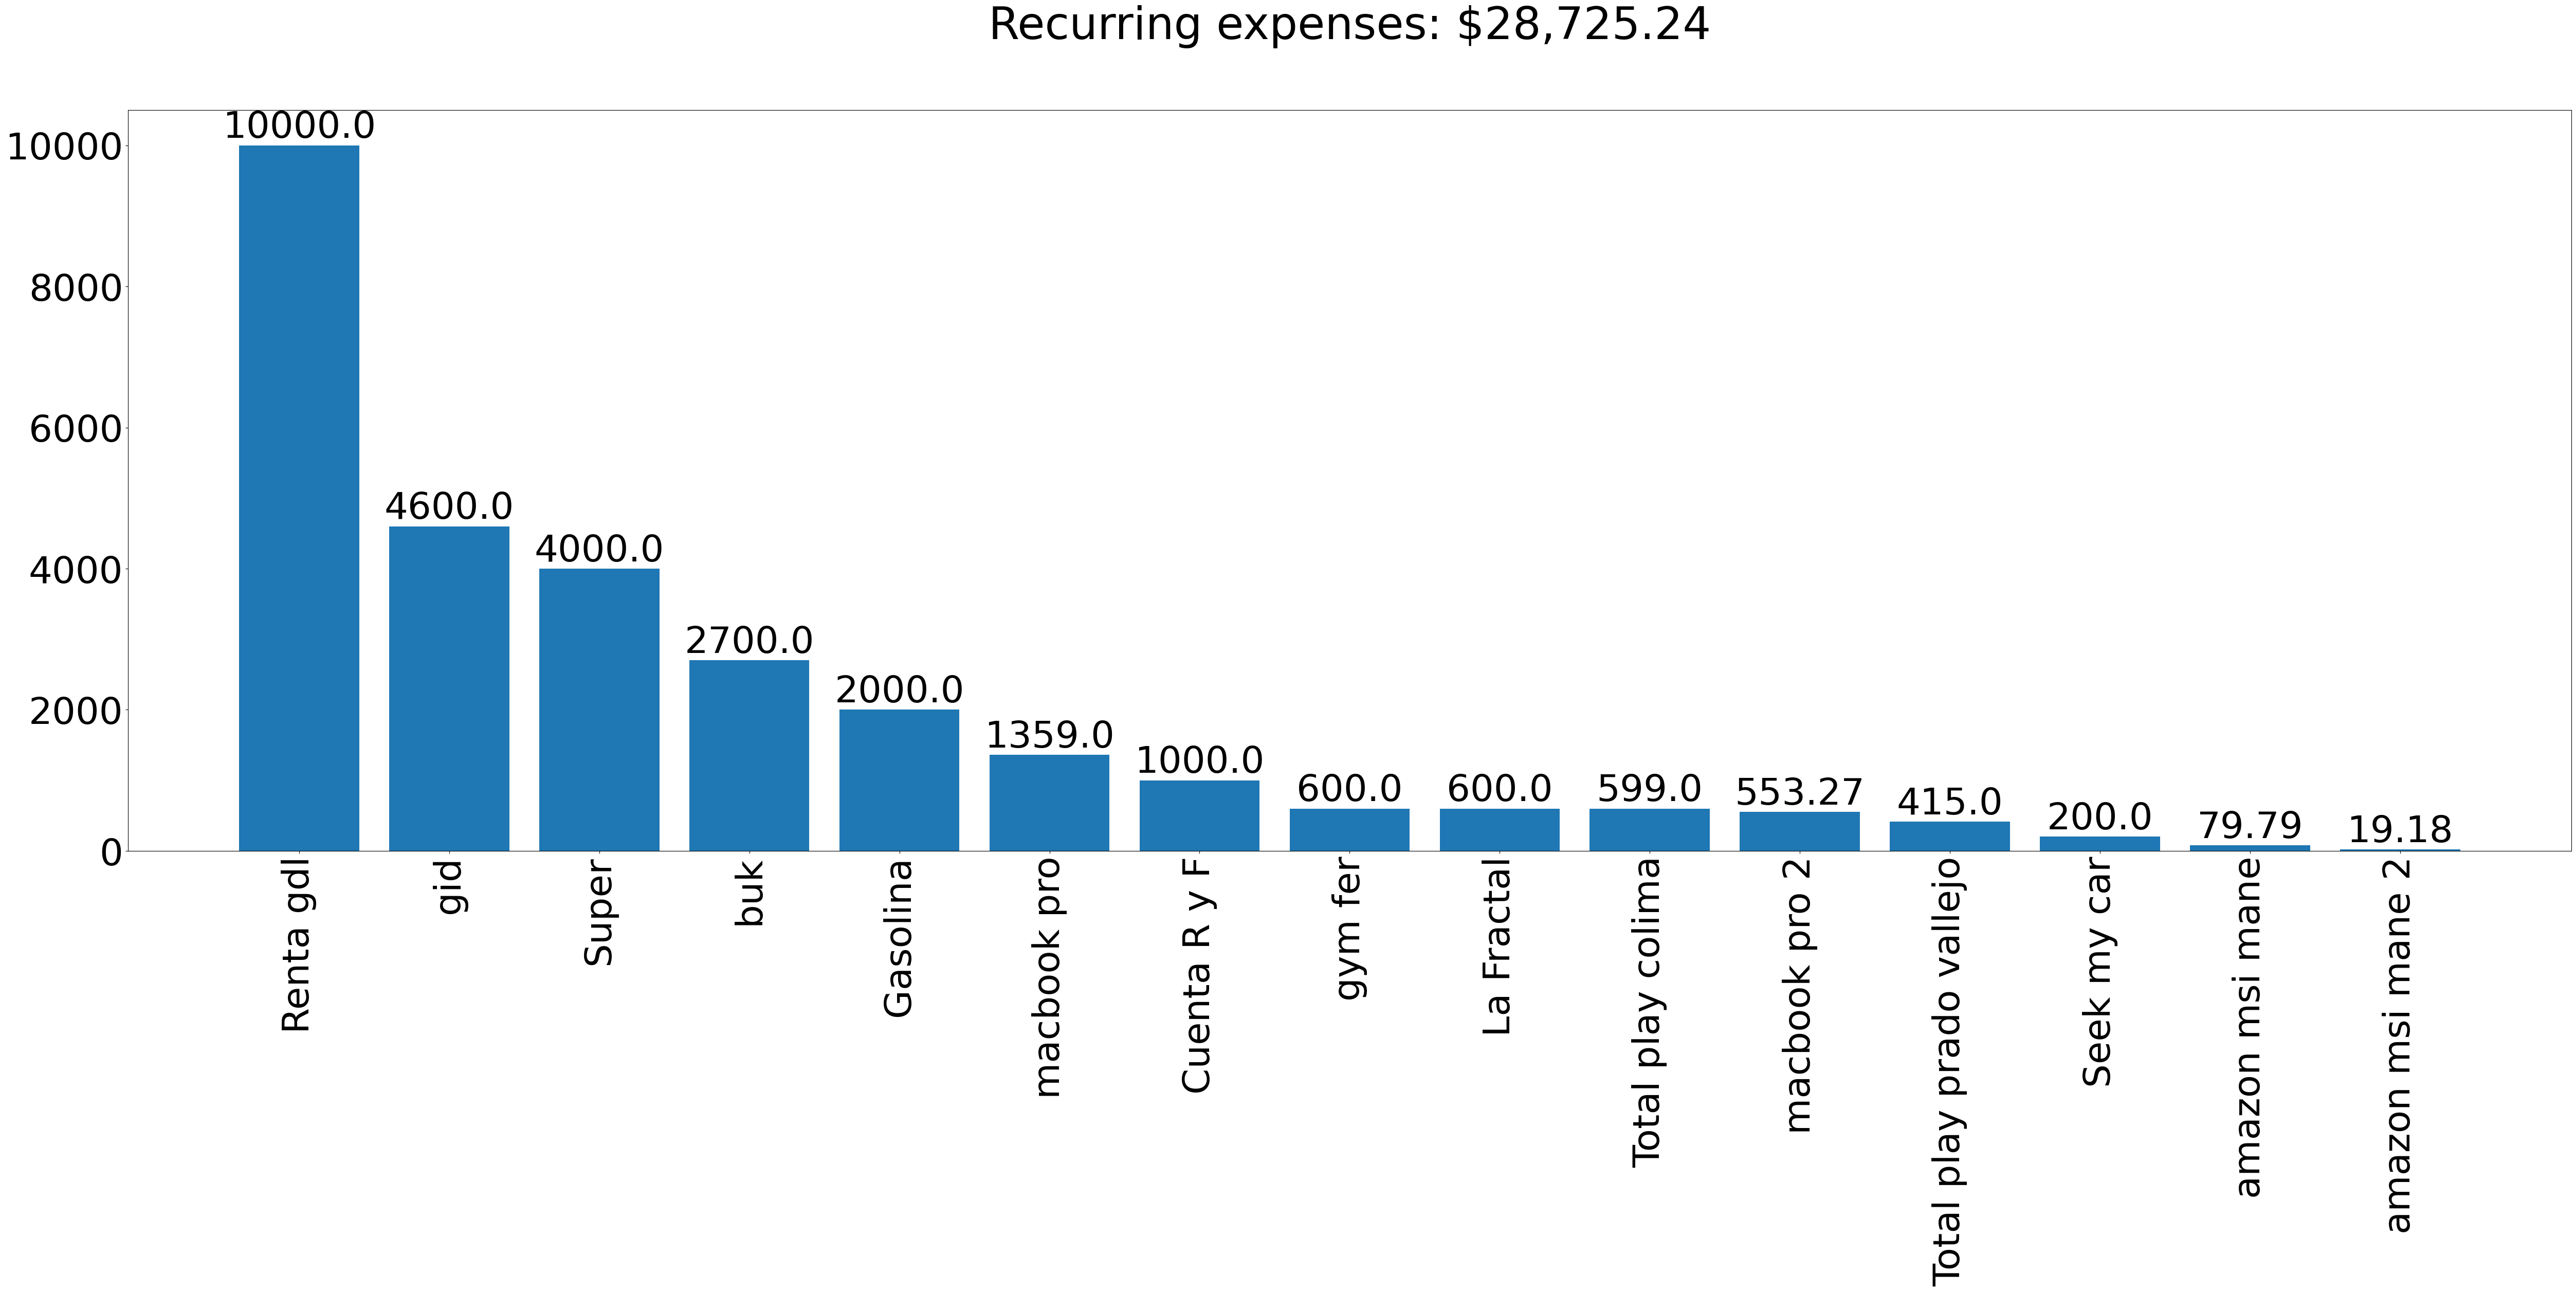

In [3]:
import matplotlib
from matplotlib import pyplot as plt


matplotlib.rcParams.update({'font.size': 52})

fig = plt.figure(figsize=(50, 25), layout='constrained')

recurring_expenses_tile = "recurring_expenses_tile"
axs = fig.subplot_mosaic([
    [recurring_expenses_tile]
])

def currency_label(series: pl.Series) -> pl.Series:
    return series.map_elements(lambda x: f"${x:,.2f}", return_dtype=pl.String)

axs[recurring_expenses_tile].set_title(f'Recurring expenses: ${recurring_expenses[amount_cn].sum():,.2f}', pad=100)
debit_bars = axs[recurring_expenses_tile].bar(recurring_expenses[description_cn], recurring_expenses[amount_cn])
axs[recurring_expenses_tile].bar_label(debit_bars, labels=recurring_expenses[amount_cn])
axs[recurring_expenses_tile].set_xticks(recurring_expenses[description_cn], recurring_expenses[description_cn], rotation='vertical')
# axs[recurring_expenses_tile].set_ylim(accounts[amount_cn].min(), accounts[amount_cn].max())





plt.show()